In [1]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo 

In [2]:
!pip install plotly

In [3]:
df = pd.read_csv('/kaggle/input/gdp-analysis0/gdp.csv')

In [4]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [5]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [6]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [7]:
df['Value'].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

### Analysing Arab World

<Axes: title={'center': 'Arab World GDP'}, xlabel='Years', ylabel='Value'>

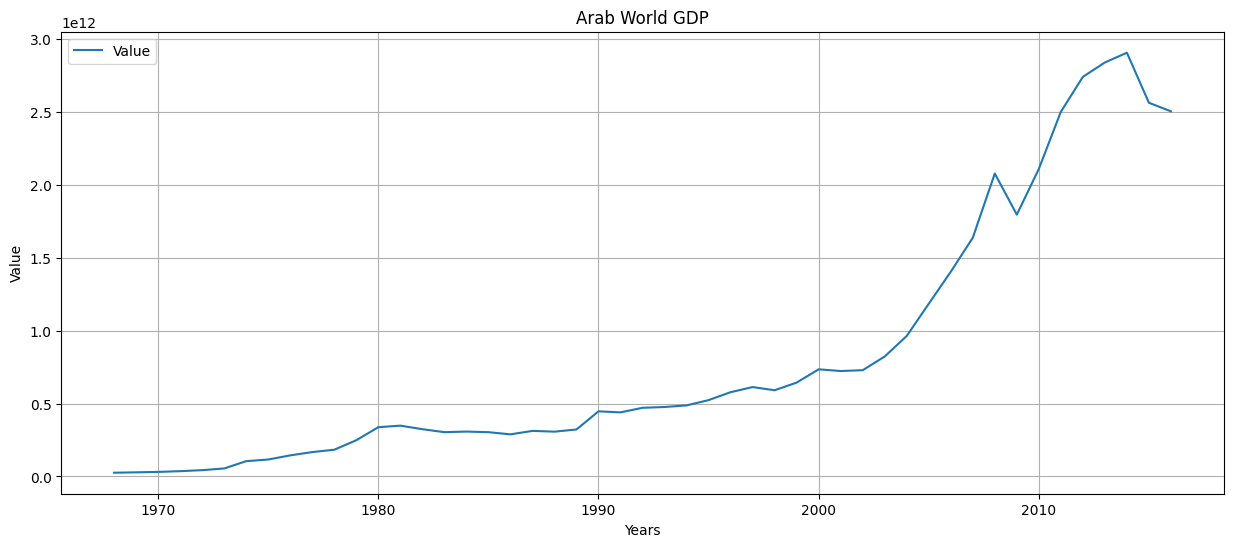

In [8]:
df_pr = df[df['Country Name'] == 'Arab World']
df_pr.plot(kind = 'line', title = 'Arab World GDP', x = 'Year', y = 'Value', xlabel = 'Years', ylabel = 'Value', grid = True, figsize = (15,6))

In [9]:
final_data = []
for i in df['Country Name'].unique():
    df_pr = (df[df['Country Name'] == i])

    gdp = [0]
    for i in range(1, len(df_pr.values)):
       curr = df_pr.values[i][3]
       prev = df_pr.values[i-1][3]
       gdp.append(round(((curr - prev)/prev)*100,2))
    df_pr = df_pr.assign(GDP = gdp)    
    final_data.append(df_pr)

In [10]:
df = pd.concat(final_data, axis = 0)

In [11]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [12]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value')
fig

In [13]:
pyo.plot(fig, filename = 'world.html')

'world.html'